# 0. 라이브러리 불러오기

In [1]:
from IPython.display import Image

import os
import glob
import platform

import geopandas as gpd
import pandas as pd
import numpy as np
pd.set_option("max.columns", None)

import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline

if platform.system() == "Windows":
    plt.rcParams["font.family"] = "Malgun Gothic"
else:
    plt.rcParams["font.family"] = "AppleGothic"

from korean_lunar_calendar import KoreanLunarCalendar

In [2]:
# 간단하게 데이터를 확인할 수 있는 함수 생성
def display_data(data = None):
    print("Shape of data :", data.shape, "\n")
    display(data.head())

# 1. 데이터 불러오기

**정의) <a href="http://index.go.kr/potal/stts/idxMain/selectPoSttsIdxMainPrint.do?idx_cd=1621&board_cd=INDX_001">해상조난사고</a>**

- 수상구조법 제2조에 따라 해상에서 선박ㆍ항공기 및 수상레저기구 등의 침몰.좌초.전복.충돌.화재.기관고장.추락 등으로 인하여 사람의 생명.신체 및 선박ㆍ항공기ㆍ수상레저기구 등의 안전이 위험에 처한 상태를 말함

In [11]:
# 반목문을 통해 데이터 불러오기
for index, data in enumerate(np.sort(glob.glob("./data/*.csv"))):
    
    globals()["data_{}".format(index + 11)] = pd.read_csv(data, encoding = "CP949")

- 반복문을 통해서 2011년부터 2020년 까지의 해상조난사고 데이터를 불러왔다.

- 연도마다 기록된 변수가 다를 뿐만 아니라 좌표를 나타내는 위도 경도 변수가 다르게 기입되어 있으므로 각 데이터를 살펴보도록 한다.

In [6]:
%whos

Variable              Type        Data/Info
-------------------------------------------
Image                 type        <class 'IPython.core.display.Image'>
KoreanLunarCalendar   type        <class 'korean_lunar_cale<...>dar.KoreanLunarCalendar'>
display_data          function    <function display_data at 0x147264af0>
glob                  module      <module 'glob' from '/Use<...>9/lib/python3.9/glob.py'>
gpd                   module      <module 'geopandas' from <...>s/geopandas/__init__.py'>
msno                  module      <module 'missingno' from <...>s/missingno/__init__.py'>
os                    module      <module 'os' from '/Users<...>n39/lib/python3.9/os.py'>
platform              module      <module 'platform' from '<...>b/python3.9/platform.py'>
plt                   module      <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
sns                   module      <module 'seaborn' from '/<...>ges/seaborn/__init__.py'>


## 1.1 해상조난사고 2011년

In [12]:
display_data(data = data_11)

Shape of data : (1554, 20) 



,발생일시,관할해경서,발생해역,발생유형,발생원인,기상특보,사고선박수,구조인원,부상인원,사망인원,실종인원,사고위치,위도,경도,선종1,톤수1,선종2,톤수2,선종3,톤수3
0,2011-12-31 13:20,울산,영해-EEZ,화재,관리소홀,양호,1.0,4.0,0.0,0.0,0.0,울기 동남방 26마일 해상,35|19|00,129|51|00,어선,9.77,NaN,NaN,NaN,NaN
1,2011-12-31 12:22,통영,항계내,추진기장애,운항부주의,양호,1.0,2.0,0.0,0.0,0.0,"34-40N,128-41-45E 해점",34|40|06,128|41|45,어선,4.97,NaN,NaN,NaN,NaN
2,2011-12-31 06:40,여수,영해,전복,운항부주의,양호,1.0,5.0,0.0,0.0,0.0,여수시 돌산읍 항대 앞,34|38|65,127|42|23,낚시어선,1.88,NaN,NaN,NaN,NaN
3,2011-12-30 21:15,부산,항계내,화재,정비불량,양호,1.0,67.0,0.0,0.0,0.0,부산 사하구 감천항 3부두 2선석(35-03.78N 129-00.70E),35|03|78,129|00|70,어선,2194.00,NaN,NaN,NaN,NaN
4,2011-12-30 12:00,서귀포,영해-EEZ,기관고장,정비불량,양호,1.0,6.0,0.0,0.0,0.0,서귀포 남방 43마일,32|31|00,126|36|00,어선,8.55,NaN,NaN,NaN,NaN


- 2011년 해상조난사고 데이터는 **1554개**의 관측치와 **20개**의 변수가 기록되어 있다.

- 2011년 데이터의 위치 좌표는 **도분초** 형태로 위도, 경도로 기입되어 있으며, **|** 구분자를 사용하여 구분되어 있다.

## 1.2 해상조난사고 2012년

In [13]:
display_data(data = data_12)

Shape of data : (1448, 20) 



,발생일시,관할해경서,발생해역,발생유형,발생원인,기상특보,사고선박수,구조인원,부상인원,사망인원,실종인원,사고위치,위도,경도,선종1,톤수1,선종2,톤수2,선종3,톤수3
0,2012-12-31 09:00,완도,영해,침수,관리소홀,양호,1.0,0.0,0.0,0.0,0.0,완도군 완도항 1부두 최경주 공원 앞 해상 안벽,34|19|00,126|45|12,어선,7.93,NaN,NaN,NaN,NaN
1,2012-12-31 08:45,여수,영해,기관고장,기타,양호,1.0,2.0,0.0,0.0,0.0,우암등대 동방 2마일 해상,34|42|04,127|50|14,어선,2.97,NaN,NaN,NaN,NaN
2,2012-12-31 08:05,부산,영해-EEZ,기타,관리소홀,양호,1.0,7.0,0.0,0.0,0.0,부산 남여도 동방 11해리,34|41|00,129|00|00,어선,69.00,NaN,NaN,NaN,NaN
3,2012-12-29 11:47,평택,항계내,침수,기타,양호,1.0,0.0,0.0,0.0,0.0,평택항 서부두 제2 물량장 앞 0.1해리 해상,36|57|18,126|49|48,낚시어선,9.77,NaN,NaN,NaN,NaN
4,2012-12-29 08:57,평택,영해,기관고장,정비불량,양호,1.0,22.0,0.0,0.0,0.0,57 인천시 옹진군 덕적면 백아리 지도 서방 0.1해리,37|04|30,126|00|50,낚시어선,9.97,NaN,NaN,NaN,NaN


- 2012년 해상조난사고 데이터는 **1448개**의 관측치와 **20개**의 변수가 기록되어 있다.

- 위치 좌표는 2011년 데이터와 동일함을 확인할 수 있다.

## 1.3 해상조난사고 2013년

In [14]:
display_data(data = data_13)

Shape of data : (910, 20) 



,발생일시,관할해경서,발생해역,발생유형,발생원인,기상특보,사고선박수,구조인원,부상인원,사망인원,실종인원,사고위치,위도,경도,선종1,톤수1,선종2,톤수2,선종3,톤수3
0,2013-12-31 13:30,평택,항계내,추진기장애,운항부주의,양호,1,4,0,0,0,경기 화성시 우정읍 입파도 인근해상,37|07|00,126|28|00,어선,7.93,NaN,NaN,NaN,NaN
1,2013-12-31 05:50,완도,영해,화재,기타,양호,1,0,0,0,0,완도군 완도읍 완도항(2부두),34|19|31,126|45|00,어선,46.00,NaN,NaN,NaN,NaN
2,2013-12-30 23:00,제주,영해,기관고장,정비불량,황천4급,1,10,0,0,0,한림북서방 20해리(33-43N 126-05E),33|43|00,126|05|00,어선,23.00,NaN,NaN,NaN,NaN
3,2013-12-30 19:40,울산,영해,좌주,운항부주의,양호,1,6,0,0,0,무림PNP 앞 해상,35|24|73,129|21|85,유조선,498.00,NaN,NaN,NaN,NaN
4,2013-12-30 05:45,군산,영해,좌초,운항부주의,양호,1,7,0,0,0,충남 서천군 홍원항 남서방 1해리 해상,36|09|00,126|28|00,어선,29.00,NaN,NaN,NaN,NaN


- 2013년 해상조난사고 데이터는 **910개**의 관측치와 **20개**의 변수가 기록되어 있다.

- 2013년 데이터의 위치 좌표도 2011년과 동일하다.

## 1.4 해상조난사고 2014년

In [15]:
display_data(data = data_14)

Shape of data : (1258, 20) 



,발생일시,관할해경서,발생해역,발생유형,발생원인,기상특보,사고선박수,구조인원,부상인원,사망인원,실종인원,사고위치,위도,경도,선종1,톤수1,선종2,톤수2,선종3,톤수3
0,2014-12-31 23:20,울산,항계내,접촉,운항부주의,풍랑주의보,1,20,0,0,0,울주군 온산읍 온산항 5부두,35|26|64,129|29|90,화물선,16316.00,NaN,NaN,NaN,NaN
1,2014-12-31 20:00,평택,항계내,기타,관리소홀,양호,1,0,0,0,0,경기 화성시 궁평항 외측해상,37|06|56,126|40|51,낚시어선,9.77,NaN,NaN,NaN,NaN
2,2014-12-31 14:04,창원,항계내,키손상,관리소홀,양호,1,1,0,0,0,부산 강서구 가덕도 대항동 외양포 솔섬 부근,35|00|15,128|49|02,낚시어선,2.28,NaN,NaN,NaN,NaN
3,2014-12-31 13:58,완도,영해,기관손상,정비불량,황천5급,1,1,0,0,0,전남 완도군 약산면 어두리 소대도 남동방,34|24|33,126|57|16,어선,1.00,NaN,NaN,NaN,NaN
4,2014-12-30 20:30,군산,영해,안전저해,운항부주의,양호,1,3,0,0,0,전북 군산시 관리도 서방 0.5마일,35|49|00,126|21|00,어선,7.93,NaN,NaN,NaN,NaN


- 2014년 해상조난사고 데이터는 **1258개**의 관측치와 **20개**의 변수가 기록되어 있다.

- 2014년 데이터의 위치 좌표도 2011년과 동일

## 1.5 해상조난사고 2015년

In [16]:
display_data(data = data_15)

Shape of data : (2548, 20) 



,발생일시,관할해경서,발생해역,발생유형,발생원인,기상특보,사고선박수,구조인원,부상인원,사망인원,실종인원,사고위치,위도,경도,선종1,톤수1,선종2,톤수2,선종3,톤수3
0,2015-12-31 23:30,서귀포,영해-EEZ,기관손상,정비불량,양호,1.0,13.0,0.0,0.0,0.0,서귀포서 마라도 남서방 27해리 해상,32|40|00,126|12|00,어선,39.00,NaN,NaN,NaN,NaN
1,2015-12-31 12:47,동해,영해,추진기손상,운항부주의,양호,1.0,4.0,0.0,0.0,0.0,독도 북동 1.3해리,37|15|29,131|52|36,어선,7.93,NaN,NaN,NaN,NaN
2,2015-12-31 08:30,동해,영해,추진기손상,운항부주의,양호,1.0,6.0,0.0,0.0,0.0,삼척시 장호 동방 20해리,37|18|44,129|44|11,어선,7.93,NaN,NaN,NaN,NaN
3,2015-12-31 06:00,목포,영해,기관손상,정비불량,양호,1.0,9.0,0.0,0.0,0.0,전남 신안군 흑산면 가거도 남동방 17해리,33|52|00,125|25|00,어선,9.77,NaN,NaN,NaN,NaN
4,2015-12-31 03:06,통영,영해,기관손상,정비불량,양호,1.0,8.0,0.0,0.0,0.0,국도 남동방 3.4해리 해점,34|31|00,128|30|00,어선,7.93,NaN,NaN,NaN,NaN


- 2015년 해상조난사고 데이터는 **2548개**의 관측치와 **20개**의 변수가 기록되어 있다.

- 위치 좌표는 마찬가지로 2011년과 동일

## 1.6 해상조난사고 2016년

In [17]:
display_data(data = data_16)

Shape of data : (2610, 20) 



,발생일시,관할해경서,발생해역,발생유형,발생원인,기상특보,사고선박수,구조인원,부상인원,사망인원,실종인원,사고위치,위도,경도,선종1,톤수1,선종2,톤수2,선종3,톤수3
0,2016-12-31 18:28,동해,영해,침몰,운항부주의,양호,1,1,1,0,0,동해 전천항 옆 동해 화력발전소 배출구 부근,37|29|00,129|09|00,어선,2.64,NaN,NaN,NaN,NaN
1,2016-12-31 17:24,창원,항계내,운항저해,연료고갈,양호,1,2,0,0,0,경남 창원시 진해구 소재 연도 남서방 2마일 해상,35|03|11,128|44|09,어선,1.24,NaN,NaN,NaN,NaN
2,2016-12-31 17:19,목포,항계내,전복,운항부주의,양호,1,0,0,0,0,영광군 안마도 동방 8해리,35|22|0,126|12|0,어선,13.00,NaN,NaN,NaN,NaN
3,2016-12-31 16:09,제주,영해,좌초,운항부주의,양호,1,3,0,0,0,비양도 북방 0.5해리,33|25|08,126|13|50,모터보트,14.00,NaN,NaN,NaN,NaN
4,2016-12-31 14:27,부산,영해,안전저해,운항부주의,양호,1,2,0,0,0,서도 남동방 1.7해리 해상,35|00|20,128|57|46,유조선,141.00,NaN,NaN,NaN,NaN


- 2016년 해상조난사고 데이터는 **2610개**의 관측치와 **20**개의 변수가 기록되어 있다.

- 위치 좌표는 동일

## 1.7 해양조난사고 2017년

In [18]:
display_data(data = data_17)

Shape of data : (2907, 20) 



,발생일시,관할해경서,발생해역,발생유형,발생원인,기상특보,사고선박수,구조인원,부상인원,사망인원,실종인원,사고위치,위도,경도,선종1,톤수1,선종2,톤수2,선종3,톤수3
0,2017-12-31 19:18,제주,영해,전복,기상악화,황천5급,1,5,0,2,1,추자남방 8.5해리,33|47|00,126|16|00,어선,40.00,NaN,NaN,NaN,NaN
1,2017-12-31 16:50,포항,영해,침수,기상악화,풍랑주의보,1,7,0,0,0,경북 포항시 구룡포 동방 11해리,36|01|00,129|49|00,어선,9.77,NaN,NaN,NaN,NaN
2,2017-12-31 16:15,통영,영해,운항저해,정비불량,양호,1,3,0,0,0,고성군 맥전포항 남서방 1.2해리 해상,34|53|33,128|08|89,모터보트,1.00,NaN,NaN,NaN,NaN
3,2017-12-31 10:35,포항,영해,기관손상,정비불량,양호,1,4,0,0,0,경북 포항시 호미곶 북동 18해리,36|16|00,129|50|00,어선,9.77,NaN,NaN,NaN,NaN
4,2017-12-31 09:06,통영,영해,안전저해,운항부주의,양호,1,8,0,0,0,통영시 소매물도 남방 100m,34|37|12,128|32|58,낚시어선,9.77,NaN,NaN,NaN,NaN


- 2017년 해상조난사고 데이터는 **2907개**의 관측치와 **20개**의 변수가 기록되어 있다.

- 위치 좌표는 동일

## 1.8 해상조난사고 2018년

In [19]:
display_data(data = data_18)

Shape of data : (3154, 20) 



,발생일시,관할해경서,발생해역,발생유형,발생원인,기상특보,사고선박수,구조인원,부상인원,사망인원,실종인원,사고위치,위도,경도,선종1,톤수1,선종2,톤수2,선종3,톤수3
0,2018-12-31 20:28,포항,영해,키손상,정비불량,황천5급,1,9,0,0,0,호미곶 북동 6해리,36|09|00,129|38|00,어선,49.00,NaN,NaN,NaN,NaN
1,2018-12-31 13:37,인천,영해,안전저해,운항부주의,양호,1,2,0,0,0,인천 영흥도 북서방 0.7해리 해상,37|17|36,126|26|49,어선,9.77,NaN,NaN,NaN,NaN
2,2018-12-31 11:31,여수,항계내,추진기손상,정비불량,양호,1,2,0,0,0,고흥군 소록도 소록선착장 남동방 50m 해상,34|29|57,127|08|04,어선,1.03,NaN,NaN,NaN,NaN
3,2018-12-31 02:57,목포,항계내,접촉,운항부주의,양호,2,13,0,0,0,진도군 서망항 항내,000|00|00,000|00|00,어선,29.00,어선,4.96,NaN,NaN
4,2018-12-30 16:45,완도,영해,운항저해,정비불량,양호,1,2,0,0,0,장흥군 노력도 동방 인근 해상,34|17|16,126|58|04,어선,0.80,NaN,NaN,NaN,NaN


- 2018년 해상조난사고 데이터는 **3154개**의 관측치와 **20개**의 변수가 기록되어 있다.

- 위치 좌표는 동일

## 1.9 해상조난사고 2019년

In [20]:
display_data(data = data_19)

Shape of data : (3820, 16) 



,발생일시,관할해경서,발생해역,위도,경도,기상상태,발생원인,발생유형,사고선박수,발생인원,구조,부상,사망,실종,선 종,톤수
0,2019-12-31 22:04,포항,영해,0 | 0 | 0,0 | 0 | 0,양호,관리소홀,기타,1,0,0,0,0,0,모터보트,1.07
1,2019-12-31 15:13,포항,영해,35 | 52 | 3,129 | 45 | 55,양호,운항부주의,충돌,1,12,12,0,0,0,어선,29.00
2,2019-12-31 15:13,포항,영해,35 | 52 | 3,129 | 45 | 55,양호,운항부주의,충돌,1,15,15,0,0,0,화물선,1415.00
3,2019-12-31 09:33,통영,협수로,34 | 41 | 6,128 | 3 | 59,양호,운항부주의,부유물감김,1,3,3,0,0,0,어선,4.96
4,2019-12-31 08:38,군산,항계 내,35 | 59 | 18,126 | 41 | 43,양호,관리소홀,침수,1,0,0,0,0,0,어선,8.55


- 2019년 해상조난사고 데이터는 **3820개**의 관측치가 존재하며, 이전 데이터들과는 다르게 **16개**의 변수만 기록되어 있다.

- 위치 좌표를 나타내는 변수명은 같으나 기입되어 있는 값이 다름을 확인할 수 있다.

## 1.10 해상조난사고 2020년

In [21]:
display_data(data = data_20)

Shape of data : (3778, 18) 



,발생일시,월별,시간대별,관할해경서,발생해역,위도,경도,기상상태,발생원인,발생유형,사고선박수,발생인원,구조,부상,사망,실종,선 종,톤수
0,2020-12-30 08:34,12,8,평택,항계 내,36 | 57 | 0,126 | 50 | 1,황천6급,관리소홀,기타,1,0,0,0,0,0,유조선,169.0
1,2020-12-30 00:26,12,0,부산,항계 내,35 | 5 | 39,129 | 2 | 17,풍랑주의보,화기취급부주의,화재,1,0,0,0,0,0,유조선,32.0
2,2020-12-29 23:33,12,23,부산,영해-EEZ,34 | 46 | 40,129 | 9 | 19,풍랑주의보,정비불량,기관손상,1,8,8,0,0,0,어선,87.0
3,2020-12-29 22:41,12,22,목포,영해,34 | 57 | 15,126 | 4 | 43,풍랑주의보,기상악화,부유물감김,1,4,4,0,0,0,예부선,124.0
4,2020-12-29 22:41,12,22,목포,영해,34 | 57 | 15,126 | 4 | 43,풍랑주의보,기상악화,표류,1,23,23,0,0,0,예부선,600.0


- 2020년 해상조난사고 데이터는 **3778개**의 관측치가 존재하며, 2019년도와 다르게 월별, 시간대별 변수가 추가되었다.

- 위치 좌표를 나타내는 변수는 2019년 데이터와 동일함을 확인할 수 있다.

**모든 데이터에 공통적으로 기입된 변수**

- 발생일시

- 관할해경서

- 발생해역

- 발생유형

- 발생원인

- 기상상태 OR 기상특보

- 위도, 경도

- 사고선박수

- 구조인원(구조)

- 부상인원(부상)

- 사망인원(사망)

- 실종인원(실종)

- 선 종(선종1)

- 톤수(톤수1)

**Q&A**

- 2019년, 2020년에는 사고위치가 존재하지 않음, 그러나 그 이외의 데이터에는 사고위치가 존재하는데 어떻게 사용할지?

- 카카오 API를 사용하여 사고위치를 수집한다고 하더라도 바다에 위치하는 관측치이기 때문에 위치 추출이 어려울 수도 있음

# 2. 데이터 병합

- 우선 공통적으로 존재하는 변수들을 사용하여 데이터를 병합해주도록 한다.

In [22]:
# 데이터 변수명 변경
data_11.rename(columns = {"기상특보" : "기상", "선종1" : "선종", "톤수1" : "톤수"}, inplace = True)
data_12.rename(columns = {"기상특보" : "기상", "선종1" : "선종", "톤수1" : "톤수"}, inplace = True)
data_13.rename(columns = {"기상특보" : "기상", "선종1" : "선종", "톤수1" : "톤수"}, inplace = True)
data_14.rename(columns = {"기상특보" : "기상", "선종1" : "선종", "톤수1" : "톤수"}, inplace = True)
data_15.rename(columns = {"기상특보" : "기상", "선종1" : "선종", "톤수1" : "톤수"}, inplace = True)
data_16.rename(columns = {"기상특보" : "기상", "선종1" : "선종", "톤수1" : "톤수"}, inplace = True)
data_17.rename(columns = {"기상특보" : "기상", "선종1" : "선종", "톤수1" : "톤수"}, inplace = True)
data_18.rename(columns = {"기상특보" : "기상", "선종1" : "선종", "톤수1" : "톤수"}, inplace = True)

# 2019년, 2020년 데이터 변수명 변경
data_19.rename(columns = {"기상상태" : "기상", "구조" : "구조인원", "부상" : "부상인원", "사망" : "사망인원", "실종" : "실종인원", "선 종" : "선종"}, inplace = True)
data_20.rename(columns = {"기상상태" : "기상", "구조" : "구조인원", "부상" : "부상인원", "사망" : "사망인원", "실종" : "실종인원", "선 종" : "선종"}, inplace = True)

# 데이터 병합
merge_data = pd.concat([data_11, data_12, data_13, data_14, data_15, data_16, data_17, data_18, data_19, data_20]).reset_index(drop = True)

# 분석에 사용하지 않는 변수 삭제
merge_data = merge_data.drop(["실종인원", "선종2", "선종3", "톤수2", "톤수3", "발생인원", "월별", "시간대별"], axis = 1)

# 병합된 데이터 확인
display_data(data = merge_data)

Shape of data : (23987, 15) 



,발생일시,관할해경서,발생해역,발생유형,발생원인,기상,사고선박수,구조인원,부상인원,사망인원,사고위치,위도,경도,선종,톤수
0,2011-12-31 13:20,울산,영해-EEZ,화재,관리소홀,양호,1.0,4.0,0.0,0.0,울기 동남방 26마일 해상,35|19|00,129|51|00,어선,9.77
1,2011-12-31 12:22,통영,항계내,추진기장애,운항부주의,양호,1.0,2.0,0.0,0.0,"34-40N,128-41-45E 해점",34|40|06,128|41|45,어선,4.97
2,2011-12-31 06:40,여수,영해,전복,운항부주의,양호,1.0,5.0,0.0,0.0,여수시 돌산읍 항대 앞,34|38|65,127|42|23,낚시어선,1.88
3,2011-12-30 21:15,부산,항계내,화재,정비불량,양호,1.0,67.0,0.0,0.0,부산 사하구 감천항 3부두 2선석(35-03.78N 129-00.70E),35|03|78,129|00|70,어선,2194.00
4,2011-12-30 12:00,서귀포,영해-EEZ,기관고장,정비불량,양호,1.0,6.0,0.0,0.0,서귀포 남방 43마일,32|31|00,126|36|00,어선,8.55


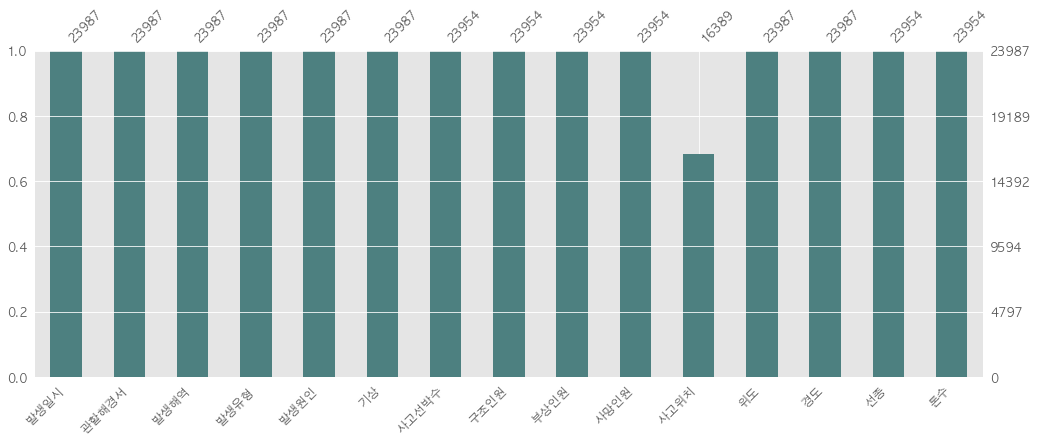

In [17]:
# 병합한 데이터 결측치 확인
msno.bar(merge_data, color = (0.3, 0.5, 0.5), figsize = (17, 6), fontsize = 12);

- **결측치가 존재하지 않는 변수** : 발생일시, 관할해경서, 발생해역, 발생유형, 발생원인, 기상, 위도, 경도

- **결측치가 존재하는 변수** : 사고선박수, 구조인원, 부상인원, 사망인원, 사고위치, 선종, 톤수

- 2019년, 2020년도 데이터에는 사고위치 변수가 존재하지 않아 결측치가 생긴것으로 판단된다.

- 카카오 혹은 네이버 API를 사용하여 사고위치를 불러올 수 있지만 해상 데이터라 존재하지 않는 관측치는 어떻게 할 것인?

# 3. 데이터 마트 구축

## 3.1 위도, 경도 좌표 변환

- 현재 데이터에는 위도 경도 좌표가 | 구분자를 사용하여 도분초로 입력되어 있다.

- 분석을 원할하게 수행하기 위해서 해당 좌표를 소수점 좌표로 변환해주도록 하자.

In [82]:
# 도분초 좌표를 변환하는 함수 생성
def location_transform(data = None):
    
    '''
    '''
    # 데이터 보존을 위해 데이터 복사
    function_data = data.copy()
    print("Shape of data *Before Transform* :", function_data.shape, "\n")
    
    # 위도 경도의 정수 자리 부분에 잘못 기입된 관측치를 추후에 제거해주기 위해 리스트 객체 생성
    except_index = []
    
    # 데이터를 반복해가면서 수행
    for index in function_data.index:
        
        try:
            # 위도와 경도의 첫 번째 값을 반환
            first_lat = int(function_data.loc[index, "위도"].split("|")[0].strip())
            first_lon = int(function_data.loc[index, "경도"].split("|")[0].strip())

            # 위도와 경도의 정수 자리 부분에 '0'으로 기입되어 있는 관측치는 제거
            if (first_lat == 0) | (first_lon == 0):
                except_index.append(index)

                # '0'으로 기입되어 있는 관측치는 그 다음 과정을 수행해줄 필요가 없다.
                continue

            # 그 외의 경우에는 좌표값을 변환해주어야 한다.
            lat_list = [int(value.strip()) for value in function_data.loc[index, "위도"].split("|")]
            lot_list = [int(value.strip()) for value in function_data.loc[index, "경도"].split("|")]

            for location, name in zip([lat_list, lot_list], ["위도", "경도"]):

                # 'location' 리스트의 첫 번째 값은 정수 자리이므로, 해당 값을 '도'로 사용하면 된다.
                integer = location[0]

                # 소수 자리는 다음과 같이 계산 : '(분 / 60) + (초 / 3600)'
                prime = location[1] / 60 + location[2] / 3600

                # 정수와 소수 부분을 더해 값을 입력해주면 된다.
                # 현재 데이터의 위도, 경도 좌표는 'object' 타입이므로, 문자열 타입으로 우선 넣어주도록 한다.
                function_data.loc[index, name] = str(integer + prime)
        
        except:
            except_index.append(index)
            
    # 반복이 끝난 후, 제거할 데이터를 삭제해주고 위도, 경도 변수를 실수형 타입으로 변경해주면 된다.
    function_data = function_data[~function_data.index.isin(except_index)].reset_index(drop = True)
    function_data[["위도", "경도"]] = function_data[["위도", "경도"]].astype("float")
    
    print("Shape of data *After Transform* :", function_data.shape, "\n")
    display(function_data.head())
    
    return function_data

In [83]:
# 'location_transform' 함수를 사용하여 좌표 변환
transform_data = location_transform(data = merge_data)

Shape of data *Before Transform* : (23987, 15) 

Shape of data *After Transform* : (23293, 15) 



,발생일시,관할해경서,발생해역,발생유형,발생원인,기상,사고선박수,구조인원,부상인원,사망인원,사고위치,위도,경도,선종,톤수
0,2011-12-31 13:20,울산,영해-EEZ,화재,관리소홀,양호,1.0,4.0,0.0,0.0,울기 동남방 26마일 해상,35.316667,129.850000,어선,9.77
1,2011-12-31 12:22,통영,항계내,추진기장애,운항부주의,양호,1.0,2.0,0.0,0.0,"34-40N,128-41-45E 해점",34.668333,128.695833,어선,4.97
2,2011-12-31 06:40,여수,영해,전복,운항부주의,양호,1.0,5.0,0.0,0.0,여수시 돌산읍 항대 앞,34.651389,127.706389,낚시어선,1.88
3,2011-12-30 21:15,부산,항계내,화재,정비불량,양호,1.0,67.0,0.0,0.0,부산 사하구 감천항 3부두 2선석(35-03.78N 129-00.70E),35.071667,129.019444,어선,2194.00
4,2011-12-30 12:00,서귀포,영해-EEZ,기관고장,정비불량,양호,1.0,6.0,0.0,0.0,서귀포 남방 43마일,32.516667,126.600000,어선,8.55


- 위도, 경도 변수가 원하는 형태로 변경이 되었음을 확인할 수 있다.

- 하지만 해상조난사고 데이터임에도 불구하고, 좌표를 변환하는 과정에 육지에 좌표가 찍히는 데이터가 존재하게 된다.

- 또한, 아래 사진 파란색 네모처럼 대한민국에서 거리가 먼 관측치도 발견됨을 확인할 수 있다.

```python
transform_data.to_csv("./data/transform_data.csv", encoding = "CP949", index = False)
```

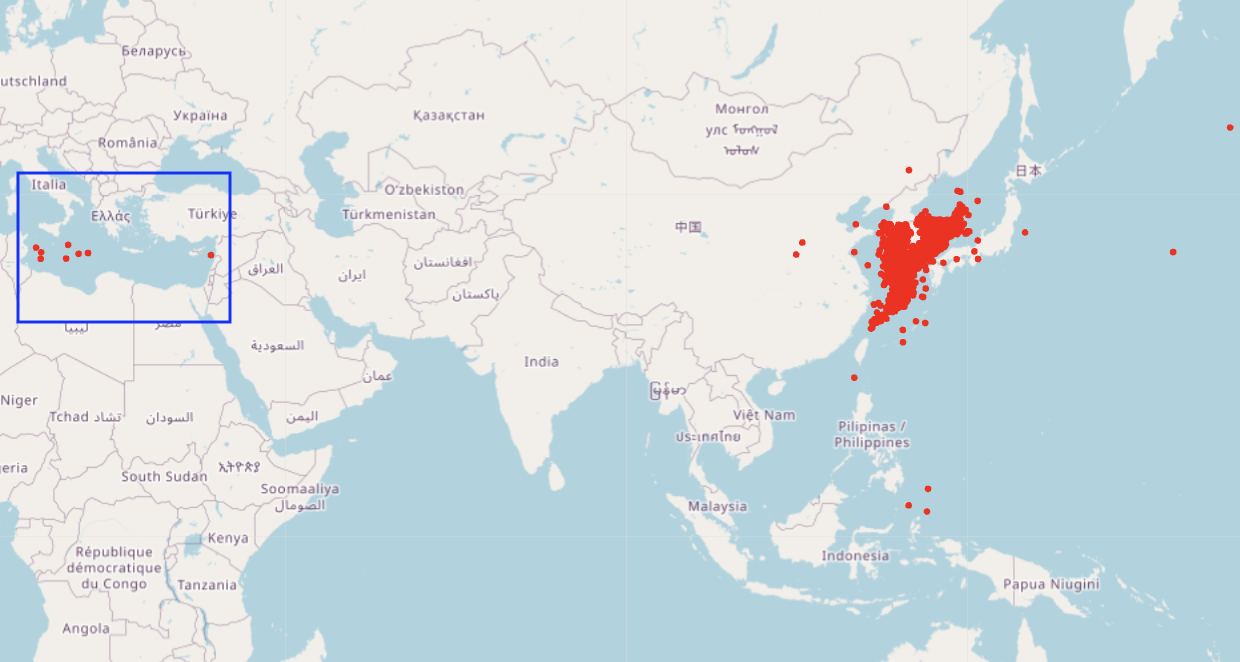

In [148]:
Image("./Images/이상치 데이터.png", width = 600, height = 300)

- 이상치 데이터를 QGIS와 [개방해](http://www.khoa.go.kr/oceanmap/main.do#) 에서 제공되는 데이터를 사용하여 제거하도록 한다.

- 개방해에서 제공되는 구역 격자를 QGIS로 불러오면 아래 사진과 같다.

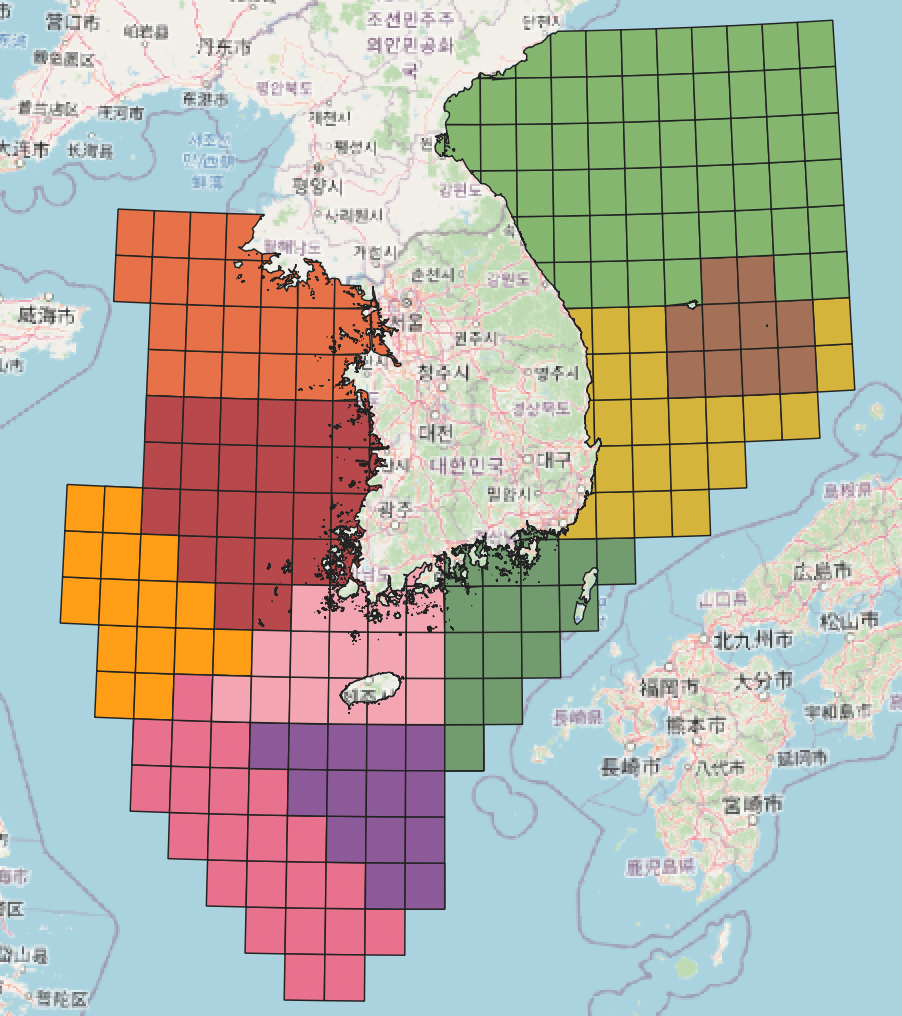

In [149]:
Image("./Images/개방해 격자.png", width = 600, height = 300)

- 총 10구역의 격자를 모두 병합한 다음, 지금까지 Python으로 작업했던 데이터를 Point로 표시한다.

- 그 다음에 격자 내부에 포함된 포인트만 선택하면 아래 사진과 같다.

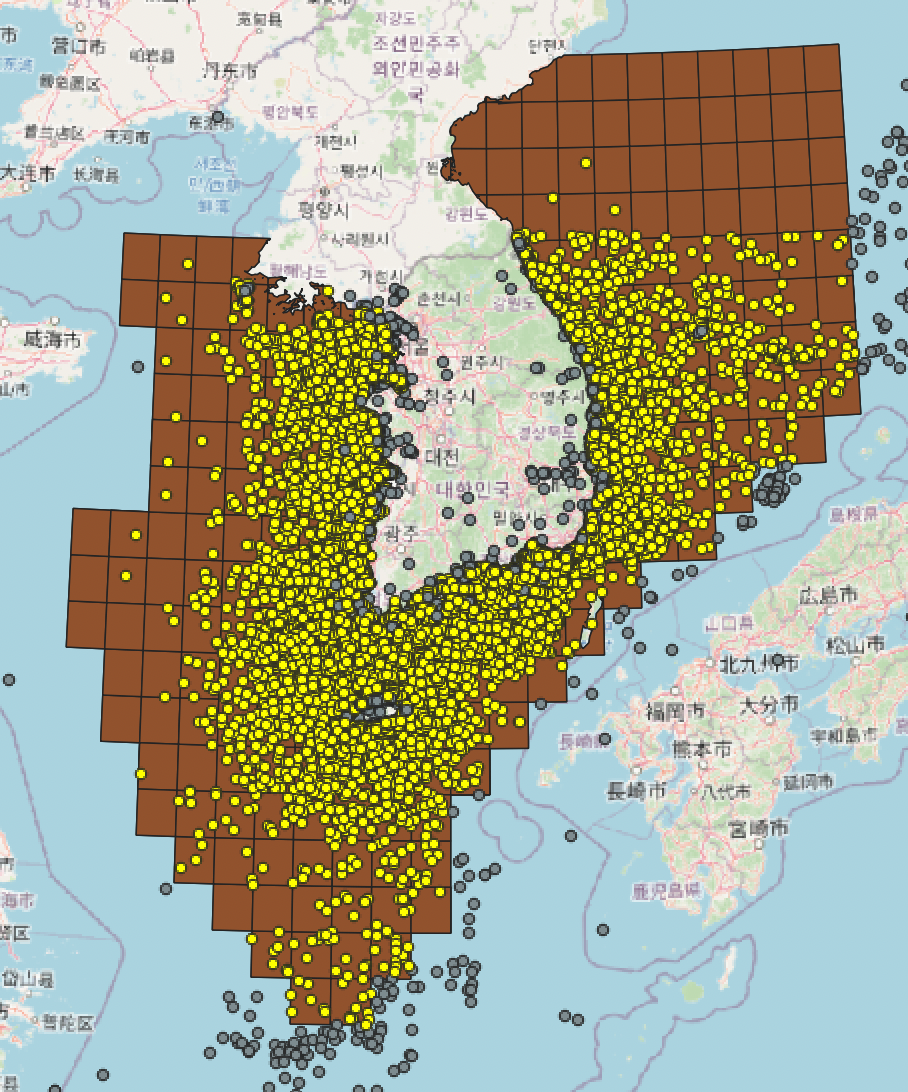

In [150]:
Image("./Images/선택 추출.png", width = 600, height = 300)

- 총 23,293개의 관측치 중에서 19,815개의 관측치만 선택되었다.

- 이제 해당 관측치만을 가지고 분석을 진행해주도록 한다.

In [155]:
# QGIS 작업 수행 후, 데이터 불러오기
final_data = pd.read_csv("./data/final_data.csv", encoding = "UTF-8")

print("Shape of final data :", final_data.shape, "\n")
display(final_data.head())

Shape of final data : (19815, 15) 



,발생일시,관할해경서,발생해역,발생유형,발생원인,기상,사고선박수,구조인원,부상인원,사망인원,사고위치,위도,경도,선종,톤수
0,2011/12/31 13:20:00,울산,영해-EEZ,화재,관리소홀,양호,1.0,4.0,0.0,0.0,울기 동남방 26마일 해상,35.316667,129.850000,어선,9.77
1,2011/12/31 12:22:00,통영,항계내,추진기장애,운항부주의,양호,1.0,2.0,0.0,0.0,"34-40N,128-41-45E 해점",34.668333,128.695833,어선,4.97
2,2011/12/31 06:40:00,여수,영해,전복,운항부주의,양호,1.0,5.0,0.0,0.0,여수시 돌산읍 항대 앞,34.651389,127.706389,낚시어선,1.88
3,2011/12/30 21:15:00,부산,항계내,화재,정비불량,양호,1.0,67.0,0.0,0.0,부산 사하구 감천항 3부두 2선석(35-03.78N 129-00.70E),35.071667,129.019444,어선,2194.00
4,2011/12/30 12:00:00,서귀포,영해-EEZ,기관고장,정비불량,양호,1.0,6.0,0.0,0.0,서귀포 남방 43마일,32.516667,126.600000,어선,8.55


## 3.2 양력 음력 변환

- 현재 발생일시 변수에 기입되어 있는 값들은 양력 날짜이다.

- 해당 변수를 음력 날짜로 변환해주도록 한다.

In [169]:
# 양력 날짜를 음력 날짜로 변환해주기 위한 함수 생성
def date_transform(data = None, column = None):
    
    # 데이터 보존을 위해 데이터 복사
    function_data = data.copy()
    
    # 음력 날짜를 저장할 리스트 생성
    lunar_list = []
    
    # 반복문을 통해 날짜 변환
    for index in function_data.index:
        
        # 양력 날짜를 변환하기 위해서는 년, 월, 일 변수가 각각 필요하다
        year = function_data.loc[index, column].year
        month = function_data.loc[index, column].month
        day = function_data.loc[index, column].day
        
        # Korea Lunar Calendar 객체 생성
        calendar = KoreanLunarCalendar()
        
        # 생성한 객체에 양력의 날짜를 지정해준다.
        calendar.setSolarDate(year, month, day)
        
        # 음력으로 변환
        lunar_date = calendar.LunarIsoFormat()
        
        # 변환한 날짜 저장
        lunar_list.append(lunar_date)
        
    return lunar_list

In [171]:
# 날짜 변수를 음력으로 변환하기 위해 '발생일시' 변수 타입 변경
final_data["발생일시"] = pd.to_datetime(final_data["발생일시"])
print("Shpae of data *Before Create* :", final_data.shape, "\n")

# 함수를 사용하여 변수 생성
final_data["음력"] = date_transform(data = final_data, column = "발생일시")

print("Shpae of data *After Create* :", final_data.shape, "\n")
display(final_data.head())

Shpae of data *Before Create* : (19815, 15) 

Shpae of data *After Create* : (19815, 16) 



,발생일시,관할해경서,발생해역,발생유형,발생원인,기상,사고선박수,구조인원,부상인원,사망인원,사고위치,위도,경도,선종,톤수,음력
0,2011-12-31 13:20:00,울산,영해-EEZ,화재,관리소홀,양호,1.0,4.0,0.0,0.0,울기 동남방 26마일 해상,35.316667,129.850000,어선,9.77,2011-12-07
1,2011-12-31 12:22:00,통영,항계내,추진기장애,운항부주의,양호,1.0,2.0,0.0,0.0,"34-40N,128-41-45E 해점",34.668333,128.695833,어선,4.97,2011-12-07
2,2011-12-31 06:40:00,여수,영해,전복,운항부주의,양호,1.0,5.0,0.0,0.0,여수시 돌산읍 항대 앞,34.651389,127.706389,낚시어선,1.88,2011-12-07
3,2011-12-30 21:15:00,부산,항계내,화재,정비불량,양호,1.0,67.0,0.0,0.0,부산 사하구 감천항 3부두 2선석(35-03.78N 129-00.70E),35.071667,129.019444,어선,2194.00,2011-12-06
4,2011-12-30 12:00:00,서귀포,영해-EEZ,기관고장,정비불량,양호,1.0,6.0,0.0,0.0,서귀포 남방 43마일,32.516667,126.600000,어선,8.55,2011-12-06


```python
final_data.to_csv("./data/AnalysisData.csv", encoding = "CP949", index = False)
```